# Deep Neural Networks - exercise 02
 >__Created__:  2018 Harrison B. Prosper
  

### Neural Networks
A neural network is a highly non-linear function. The functional form of a single layer with $I$ inputs and $J$ outputs is

$$y_{j}(x) = f\left(b_{j} + \sum_{i=1}^I w_{ji} \, x_i\right),\quad j = 1,\cdots,J,$$
which in matrix notation is
$$\mathbf{y} = f\left(\mathbf{b} + \mathbf{w} \, \mathbf{x}\right),$$
where $f(*)$ is a non-linear function to be applied element-wise to its matrix argument. Popular examples of $f(*)$ are
\begin{align*}
    f(z) & = \tanh{z},\\
    f(z) & = \max(0, z) \quad\textrm{reLU function}.
\end{align*}

Consider a neural network with $I$ inputs, $x_{i}, i = 1, \cdots, I$, a single hidden layer with $H$ nodes, and $K$ outputs $y_{k}(x), k = 1, \cdots, K$. Such a network is said to be *shallow* with structure $(I, H, K)$. The functional form is

$$y = f^\prime(\mathbf{b}_1 + \mathbf{w}_1 \, f(\mathbf{b}_0 + \mathbf{w}_0 \, \mathbf{x})),$$

where the subscripts label the layers, and, usually, the output function $f^\prime$ differs from $f$. For regression,  $f^\prime$ is
the $identity$. For 2-class (i.e., binary) classification it is usually the $logistic$ function 

$$f^\prime(z) = \frac{1}{1 + \exp(-z)},$$ 

while for multi-class classification one typically uses the $softwmax$ function

$$y_j = f^\prime(z_j) = \frac{\exp(z_j)}{\sum_{k=1}^K \exp(z_k)}.$$ 

For the special case of a single output network, the $\mathbf{b}_1$ becomes a scalar $b$ and $\mathbf{w}_1$ 
is a column matrix.

### Deep Neural Networks
A feed forward deep neural network (DNN) contains two or more hidden layers 
compounded recursively. For example, a DNN with two hidden layers has the functional form

$$y = f(\mathbf{b}_2 + \mathbf{w}_2 \, f^\prime(\mathbf{b}_1 + \mathbf{w}_1 \, f(\mathbf{b}_0 + \mathbf{w}_0 \, \mathbf{x}))).$$

### Exercise
  1. Build a deep network, using __MLPRegression__, to predict wine quality. 
  1. Vary the number of layers and nodes/layer

In [1]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# update fonts
FONTSIZE = 32
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 28}

mp.rc('font', **font)

### Load data into memory

In [3]:
wine = pd.read_csv('../../datasets/whitewine.csv')
names= wine.keys().tolist()
inputs = names[:-1]
print inputs
wine[0:10]

['acetic', 'citric', 'suger', 'salt', 'SO2free', 'SO2tota', 'pH', 'sulfate', 'alcohol']


,acetic,citric,suger,salt,SO2free,SO2tota,pH,sulfate,alcohol,quality
0,0.180,0.33,1.4,0.029,35.0,138.0,3.36,0.60,11.5,0.7
1,0.685,0.21,9.5,0.070,33.0,172.0,3.00,0.55,9.1,0.6
2,0.210,0.28,2.4,0.056,49.0,159.0,3.02,0.47,8.8,0.8
3,0.250,0.13,17.2,0.036,49.0,219.0,2.96,0.46,9.7,0.5
4,0.420,0.23,8.8,0.054,42.0,215.0,3.02,0.58,9.2,0.6
5,0.240,0.15,7.1,0.043,32.0,134.0,3.24,0.48,9.9,0.6
6,0.250,0.37,1.0,0.043,10.0,80.0,3.08,0.38,11.4,0.5
7,0.140,0.32,1.1,0.022,48.0,116.0,3.04,0.67,10.0,0.6
8,0.310,0.26,7.3,0.050,37.0,157.0,3.09,0.43,9.0,0.5
9,0.410,0.18,3.5,0.027,23.0,109.0,3.34,0.54,12.8,0.8


### Split into testing and training data samples

In [8]:
test_fraction = 0.20
train_data, test_data = train_test_split(wine, test_size=test_fraction)
print train_data.shape, test_data.shape

(3918, 10) (980, 10)


### Prepare data for training/testing

In [9]:
def standardize_data(train_data, test_data, names):
    scaler  = StandardScaler()
    scaler.fit(train_data[names])
    
    X_train = scaler.transform(train_data[names])
    y_train = train_data['quality']
    
    X_test  = scaler.transform(test_data[names])
    y_test  = test_data['quality']
    return (X_train, X_test, y_train, y_test, scaler)

In [10]:
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)
X_train[0:5]

array([[-0.17981027, -0.35381278, -0.11688106, -0.95388678, -0.54186596,
        -1.51599277,  0.61027468,  0.35379052,  0.38502996],
       [ 0.61522051, -1.1005297 , -0.11688106,  0.73415676,  0.9991176 ,
         1.53516582, -0.11673118, -0.4337457 , -0.58847554],
       [-0.67670451, -0.27084423, -0.01625039, -0.3151676 ,  0.70277461,
        -0.04954446,  0.54418324, -1.57129801,  1.76416275],
       [-0.37856797, -0.35381278, -0.68041282, -0.452036  , -1.07528334,
        -0.49893991,  1.13900622,  1.66635088, -0.34509917],
       [-0.17981027,  0.06102995,  1.61396649,  0.96227075, -0.00844857,
         1.20403233, -0.77764561,  0.35379052, -1.15635375]])

### Define function space 


In [11]:
dnn = MLPRegressor(hidden_layer_sizes=(10, 10), 
                    max_iter=200, 
                    alpha=1e-3,
                    solver='adam', 
                    verbose=1, 
                    tol=1e-6, 
                    warm_start=False,
                    random_state=1)
# possible combinations of params
params = {'max_iter': [50,100,200],
          'hidden_layer_size': [(len)]
          'alpha': [1e-3,2e-3,4e-3,8e-3],
          'solver' : ['sgd', 'adam']}

### Choose a function, aka train a regressor!

In [13]:
print "*** TRAINING ***"
dnn.fit(X_train, y_train)

print("Training set score: %f" % dnn.score(X_train, y_train))      
print("Test set score:     %f" % dnn.score(X_test,  y_test))

filename = '02_dnn_wine.pkl'
print "save to %s" % filename
joblib.dump(dnn, filename)

*** TRAINING ***
Iteration 1, loss = 0.57506732
Iteration 2, loss = 0.23242585
Iteration 3, loss = 0.09855838
Iteration 4, loss = 0.05653152
Iteration 5, loss = 0.04166801
Iteration 6, loss = 0.03231590
Iteration 7, loss = 0.02534604
Iteration 8, loss = 0.02005435
Iteration 9, loss = 0.01618368
Iteration 10, loss = 0.01331767
Iteration 11, loss = 0.01124038
Iteration 12, loss = 0.00970886
Iteration 13, loss = 0.00855359
Iteration 14, loss = 0.00771420
Iteration 15, loss = 0.00703764
Iteration 16, loss = 0.00652322
Iteration 17, loss = 0.00607480
Iteration 18, loss = 0.00570452
Iteration 19, loss = 0.00539209
Iteration 20, loss = 0.00512191
Iteration 21, loss = 0.00487282
Iteration 22, loss = 0.00468771
Iteration 23, loss = 0.00451243
Iteration 24, loss = 0.00436142
Iteration 25, loss = 0.00421861
Iteration 26, loss = 0.00412007
Iteration 27, loss = 0.00400289
Iteration 28, loss = 0.00392026
Iteration 29, loss = 0.00384253
Iteration 30, loss = 0.00376986
Iteration 31, loss = 0.00370425


['02_dnn_wine.pkl']

### Plot loss curve vs. epochs

In [20]:
def plotLoss(dnn, ftsize=FONTSIZE):
    y    = dnn.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.8*min(y)
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('02_dnn_wine_loss.png')
    plt.show()

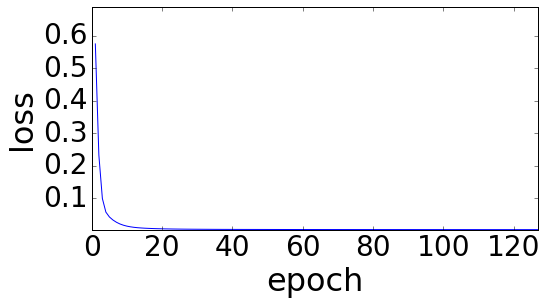

In [21]:
plotLoss(dnn)

### plot results

In [24]:
def plotResults(dnn, X_test, y_test, xmin=0, xmax=1, ymin=0, ymax=1, ftsize=FONTSIZE):
    p = dnn.predict(X_test)
    
    # set size of figure
    plt.figure(figsize=(8,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'wine quality', fontsize=ftsize)
    plt.ylabel(r'predicted wine quality', fontsize=ftsize)
    
    # choose color of points
    blue= (0,0,1)
    plt.scatter(y_test, p, marker='o', s=50, c=blue, alpha=0.2)    
    plt.savefig('02_dnn_wine_results.png')
    plt.show()

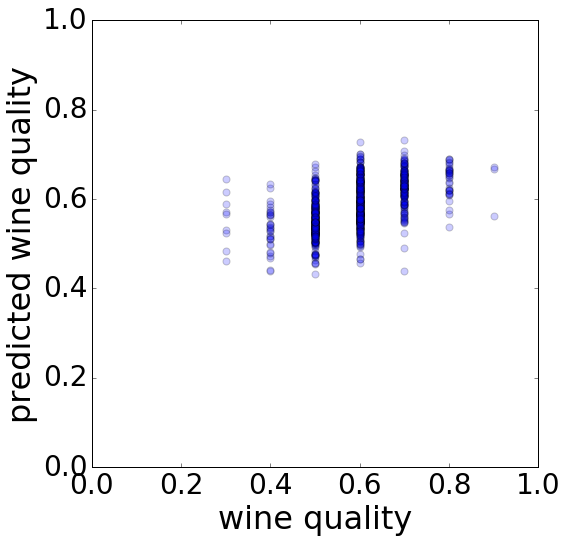

In [25]:
plotResults(dnn, X_test, y_test)